In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
from scipy.optimize import bisect

In [12]:
oe_list=[[1,1],[1,-1]]

single_row = np.zeros([8,8])

for i in range(2):
    for j in range(2):
        for k in range(2):
            single_row[i*4+j*2+k,:] = np.kron(np.kron(oe_list[i],oe_list[j]),oe_list[k])

In [13]:
single_row

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1.],
       [ 1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [ 1., -1., -1.,  1.,  1., -1., -1.,  1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
       [ 1., -1.,  1., -1., -1.,  1., -1.,  1.],
       [ 1.,  1., -1., -1., -1., -1.,  1.,  1.],
       [ 1., -1., -1.,  1., -1.,  1.,  1., -1.]])

In [6]:
M2 = np.zeros([64,64])
for i in range(8):
    for j in range(8):
        M2[i*8+j,:] = np.kron(single_row[i],single_row[j]).reshape([64,])

In [15]:
damp = [[1,0,0,1,0,1,1,0],[0,1,1,0,1,0,0,1],[0,1,1,0,1,0,0,1],[1,0,0,1,0,1,1,0],[0,1,1,0,1,0,0,1],[1,0,0,1,0,1,1,0],[1,0,0,1,0,1,1,0],[0,1,1,0,1,0,0,1]]
damp

[[1, 0, 0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 0, 1],
 [0, 1, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 0],
 [1, 0, 0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 0, 1]]

In [17]:
M2@np.array(damp).reshape([64,])

array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 32.])

In [18]:
np.array([[1,1],[1,-1]])@np.array([[0,1],[1,0]])@np.array([[1,1],[1,-1]])

array([[ 2,  0],
       [ 0, -2]])

In [103]:
(np.linalg.inv(M2)@v).reshape([4,4])

array([[ 0.5,  0. ,  0.5,  0. ],
       [ 0. , -0.5,  0. , -0.5],
       [ 0.5,  0. ,  0.5,  0. ],
       [ 0. , -0.5,  0. , -0.5]])

In [97]:
np.array(v).reshape([4,4])

array([[ 0,  0,  1,  0],
       [ 0,  0,  0,  0],
       [-1,  0,  0,  0],
       [ 0,  0,  0,  0]])

Two boundary symmetries

In [2]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)
X1234 = np.zeros([1,1,16,16])
X1234[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,X)))
X12 = np.zeros([1,1,16,16])
X12[0,0,:,:] = np.kron(X,np.kron(X,np.kron(Id,Id)))

X14= np.zeros([1,1,16,16])
X14[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,X)))

X13= np.zeros([1,1,16,16])
X13[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(X,Id)))

X24= np.zeros([1,1,16,16])
X24[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(Id,X)))

X23= np.zeros([1,1,16,16])
X23[0,0,:,:] = np.kron(Id,np.kron(X,np.kron(X,Id)))

X34= np.zeros([1,1,16,16])
X34[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(X,X)))


X1 = np.zeros([1,1,16,16])
X1[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,Id)))


X4 = np.zeros([1,1,16,16])
X4[0,0,:,:] = np.kron(Id,np.kron(Id,np.kron(Id,X)))


MPO1234 = iMPS.iMPO()
MPO1234.construct_from_tensor_list([X1234,X1234])

MPO14 = iMPS.iMPO()
MPO14.construct_from_tensor_list([X14,X14])

MPO13 = iMPS.iMPO()
MPO13.construct_from_tensor_list([X13,X13])

MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO1 = iMPS.iMPO()
MPO1.construct_from_tensor_list([X1,X1])

MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([X4,X4])


MPO23 = iMPS.iMPO()
MPO23.construct_from_tensor_list([X23,X23])

MPO24 = iMPS.iMPO()
MPO24.construct_from_tensor_list([X24,X24])

MPO34 = iMPS.iMPO()
MPO34.construct_from_tensor_list([X34,X34])

X123 = np.zeros([1,1,16,16])
X123[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,Id)))
MPO123 = iMPS.iMPO()
MPO123.construct_from_tensor_list([X123,X123])





In [20]:
lam1ss=[]
lam4ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam34ss=[]
lam24ss=[]
lam23ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0.,1.01,0.05)
for p1 in np.arange(0.,.01,0.05): 
    lam1s=[]
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    lam34s=[]
    lam24s=[]
    lam23s=[]
    lam4s=[]
    
    
    for p2 in rng:
        #trans = funcs.single_trans_qc2(p1=p1,channel1='x_flip',p2=p2,channel2='z_flip')
        trans = funcs.single_trans_2layers(p1=0,channel1='x_flip',p2=p2,channel2='x_flip')
        #trans = funcs.single_trans_2layers_swap(p1=p1,p2=p2,channel='x_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
        MPS_power2.update(100,1e-6,1e-8)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
        lam1 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
        lam4 = strap.calculate_eig()
        
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO24,MPS_power2.MPS2)
        lam24 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO34,MPS_power2.MPS2)
        lam34 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO23,MPS_power2.MPS2)
        lam23 = strap.calculate_eig()
    
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam1234s.append(lam1234)
        lam1s.append(lam1)
        lam4s.append(lam4)
        lam34s.append(lam34)
        lam24s.append(lam24)
        lam23s.append(lam23)
        print(p2)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam1234ss.append(lam1234s)
    lam1ss.append(lam1s)
    lam4ss.append(lam4s)
    lam34ss.append(lam34s)
    lam24ss.append(lam24s)
    lam23ss.append(lam23s)
  

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001


AssertionError: nondegenerate state expected

In [ ]:
pyplot.figure(figsize=(18,9),dpi=120)
pyplot.imshow(np.real(lam13ss), origin='lower', extent=[ 0, 0.18,0.17, 0.31,],aspect=1)
x = np.arange(0.,0.18,0.001)
y = (1-np.sqrt(2)/2-x)/(1-x*2)
pyplot.plot(x,y,color='red')
pyplot.show()

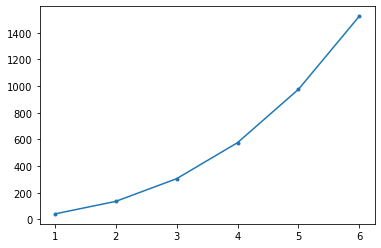

In [60]:
x = [1,2,3,4,5,6]
y = [0.1948,0.2928,1/3,0.355278,0.368928,0.377982]
pyplot.plot(x,2/(np.array(y)-np.sqrt(2)+1)**2,'.-')

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


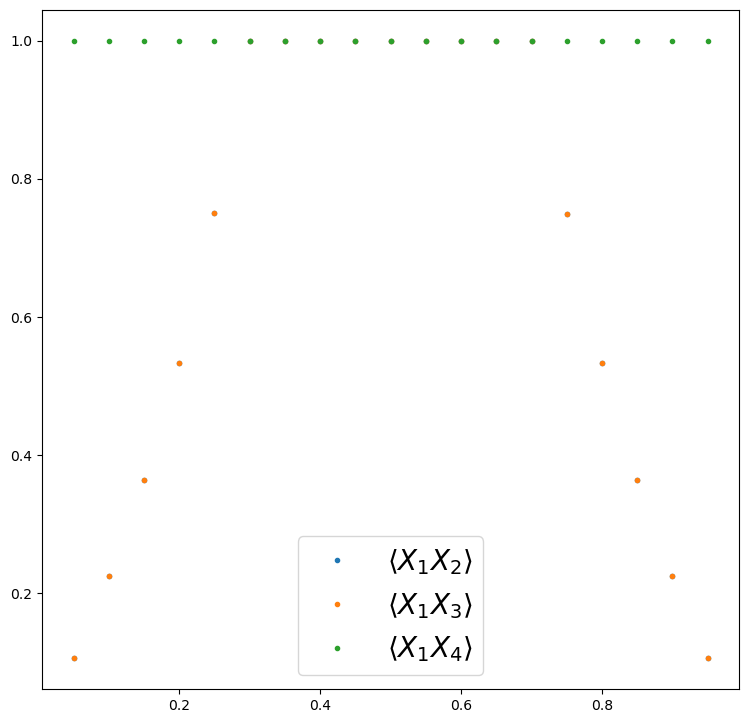

In [22]:
#rng = np.arange(0.06,0.09,0.002)
pyplot.figure(figsize=(9,9),dpi=100)
#pyplot.plot(rng,lam1234s,'.',label='$\langle X_1X_2X_3X_4 \\rangle$')

pyplot.plot(rng[1:-1],lam12s[1:],'.',label='$\langle X_1X_2 \\rangle$')
pyplot.plot(rng[1:-1],lam13s[1:],'.',label='$\langle X_1X_3 \\rangle$')
pyplot.plot(rng[1:-1],lam14s[1:],'.',label='$\langle X_1X_4 \\rangle$')
#pyplot.plot(rng,[1]*len(rng))
#pyplot.plot(rng[-25:],k*np.array(rng[-25:])+d,label='3.3399*p - 0.68003')
pyplot.legend(prop={'size':20})
pyplot.show()

In [121]:
k,d = np.polyfit(rng[-22:-18],lam14s[-22:-18],1)

In [32]:
x = np.arange(1,20)
y = 1 - 2**(-(x-1)/2)

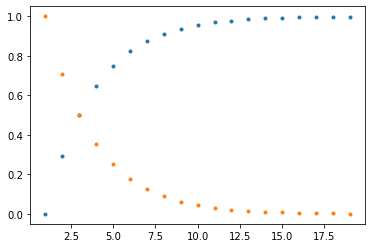

In [35]:
pyplot.plot(x,y,'.')
pyplot.plot(x,1-y,'.')


In [123]:
(1-d)/k

(0.3542866509950173+7.842496560370235e-18j)

In [12]:
x = np.arange(.011,6,0.01)
y = []
def renyi2(x,n):
    return np.log2(x**n+(1-x)**n)/(1-n)

for i in x:
    def Hn(x):
        return renyi2(x,i)-0.5
    
    y.append( bisect(Hn,0,.3))

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

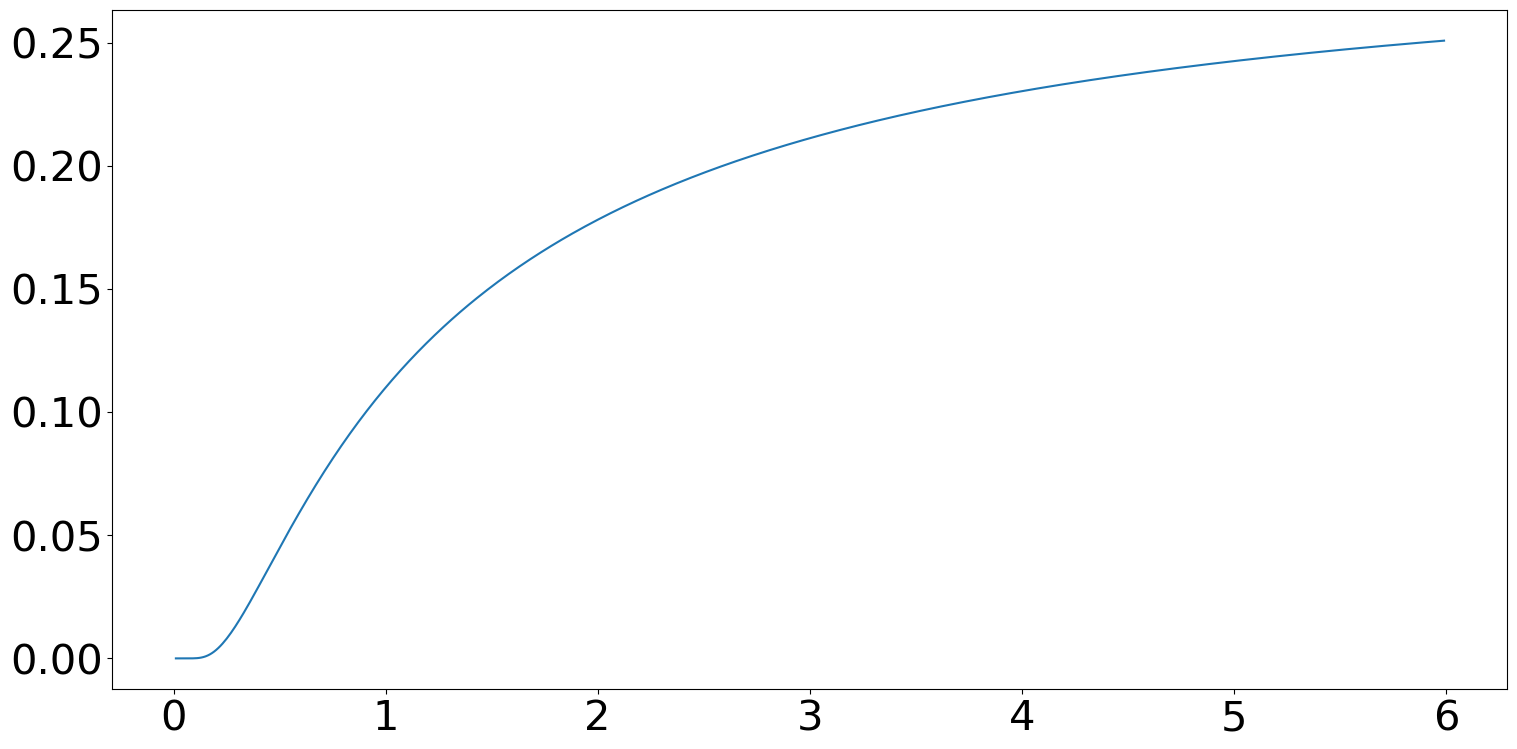

In [13]:
pyplot.figure(figsize=(18,9),dpi=100)
pyplot.plot(x,y,'-')

pyplot.xticks(size=30)
pyplot.yticks(size=30)

In [86]:
0.583627816

1.4922080697222415

In [73]:
0.5*(1-np.sqrt(3)/3)

0.21132486540518713